## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Mounting the drive to load our data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Loading the relavent dataset and the libraries we'll need.**

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the relavent dataset.
file_path = '/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv'
df = pd.read_csv(file_path)

In [ ]:
# Checking how the dataframe looks.
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### **Explaining the problem statement and the data :**

---

We have a dataset which contains booking data for two hotels and has several intricate details about every individual instance of booking. 

These details include things like how many adults, children and babies were there for a booking, what meal categories the guests chose, which distribution channel they used to make the booking, if they made any modifications to the booking. Which market segment they belong to, the duration of their stay, the type of room they booked and much more.

We will perform Exploratory Data Analysis on this data and try to arrive at data-driven industrial insights.

First Let's understand the data which is in tabular form(rows and columns)

Each Row in our dataset contains information for a particular instance of booking. Now Let's explain what every column in our dataset contains.

 1.  hotel - Hotel Name 
 2.   is_canceled - If a booking was canceled or not. 
*   0 - Booking was not cancelled.
*   1 - Booking was cancelled.


 3.   lead_time - Waiting time(in days) between the time of booking and time of arrival.
 4.   arrival_date_year - Year of arrival.
 5.   arrival_date_month - Month of arrival.
 6.   arrival_date_week_number - Week number of arrival.          
 7.   arrival_date_day_of_month - Day number of arrival.        
 8.   stays_in_weekend_nights - No. of weekend nights that the customer stayed for.           
 9.   stays_in_week_nights - No. of week nights that the customer stayed for.              
 10.   adults - No. of adults staying.
 11.  children - No. of children staying. 
 12.  babies - No. of babies staying.
 13.  meal - Meal type chosen by the customer. 
*   SC - Self catering.(No meals included)
*   BB - Bed and Breakfast
*   HB - Half Board(Breakfast and Lunch/ Breakfast and Dinner)
*   FB - Full Board(Breakfast + Lunch + Dinner)


 14.  country - Country of origin of the customer.
 15.  market_segment - Market segment to which customer belongs.
 16.  distribution_channel - Distribution channel through which booking was made. 
 17.  is_repeated_guest - Whether or not a customer has stayed in the same hotel before. 
*   0 - Not a repeated guest
*   1 - A repeated guest(Has stayed in the same hotel before)

 18.  previous_cancellations - Previous cancellations made by the customer.         
 19.  previous_bookings_not_canceled - Previous bookings that haven't been canceled.
 20.  reserved_room_type - Type of the room reserved.  
 21.  assigned_room_type - Type of the room assigned.            
 22.  booking_changes - No. of booking changes made.
 23.  deposit_type - Type of deposit made.
 24.  agent - Unique ID of Agent through which booking is made.
 25.  company -  Unique ID of Company through which booking was made.
 26.  days_in_waiting_list - number of days spent on the waiting list by customer.
 27.  customer_type - Type of customer.
 28.  adr - Average daily rate.
 29.  required_car_parking_spaces - No. of car parking spaces required by the customer.     
 30.  total_of_special_requests - Total number of special requests made by the customers.        
 31.  reservation_status - Status of reservation.              
 32.  reservation_status_date - Date of change in reservation status.

---




In [ ]:
# Getting the information about the entries in the dataframe - their dtypes and no. of null values, columns etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Let's create a copy of this dataframe so as to keep it preserved before we operate on it.
new_df = df.copy()

### **Data Preparation :**

---



In [ ]:
# Let's see if there are any duplicate values in our dataframe.
df[df.duplicated()]
# So indeed, below are the duplicated rows.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [ ]:
# Let's drop these duplicate values from our dataframe. Which will make it easier to operate on.
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# This shortens our dataset significantly.
# Now let's check if there are null values in our df.
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


So we see that just the two columns in our df account for most of the null values and only 4 columns have null values.
We need to be very careful when operating on these 4 columns.

In [ ]:
# So we can now proceed by removing the two columns that account for the most number of null values.
# We can't simply drop these observations as it'll lead to a shorter dataframe as null values in these columns are in tens of thousands.
df=df.drop(columns=['agent','company'])

In [ ]:
# Now let us deal with the null values in other columns.
# As now there are just two columns that have small number of null values in them, we can simply drop those observations.
df.dropna(inplace=True)

In [ ]:
# Checking the new shape of our df.
df.shape

(86940, 30)

In [ ]:
# Confirming if all the null values have been removed or not.
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Now as we can see all the null values have been dealt with.

Now we need to check if there are any outliers in our dataframe.

In [ ]:
# Checking the stats of our df.
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,86940,86940.000000,86940.000000,86940.000000,86940,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940,86940,86940,86940,86940.000000,86940.000000,86940.000000,86940,86940,86940.000000,86940,86940.000000,86940,86940.000000,86940.000000,86940.000000,86940,86940
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,7,5,NaN,NaN,NaN,10,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2016-02-14
freq,53418,NaN,NaN,NaN,11232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67562,27449,51543,69028,NaN,NaN,NaN,56189,46151,NaN,85796,NaN,71573,NaN,NaN,NaN,62953,211
mean,NaN,0.275903,80.193375,2016.211824,NaN,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,NaN,NaN,NaN,NaN,0.039234,0.030228,0.176708,NaN,NaN,0.271854,NaN,0.753497,NaN,106.574804,0.083448,0.699459,NaN,NaN
std,NaN,0.446971,86.100147,0.686016,NaN,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,NaN,NaN,NaN,NaN,0.194152,0.369574,1.717885,NaN,NaN,0.728090,NaN,10.041816,NaN,54.957439,0.280402,0.831840,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,12.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,72.250000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,50.000000,2016.000000,NaN,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,98.400000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,125.000000,2017.000000,NaN,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,134.100000,0.000000,1.000000,NaN,NaN


Text(0.5, 1.0, 'Boxplot to detect outliers in our dataframe.')

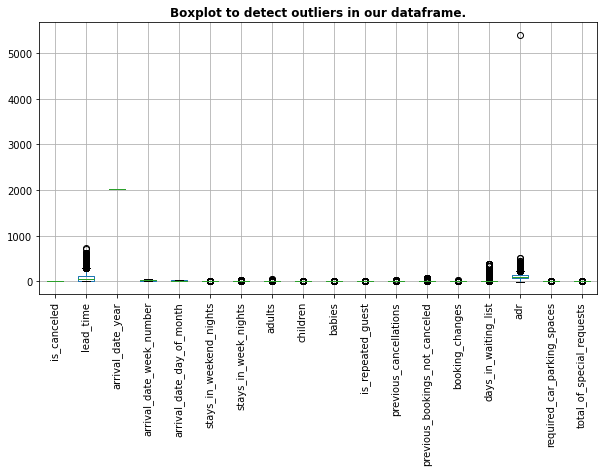

In [ ]:
# We can use a boxplot to check for outliers in our df.
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)       # We rotate the xticks to avoid overlapping due to lack of space.

# Setting the title.
plt.title('Boxplot to detect outliers in our dataframe.', weight='bold')

From this graph, its clear that there are outliers in the adr,  lead_time, and days_in_waiting_list columns.

Text(0.5, 1.0, 'Boxplot for adr column')

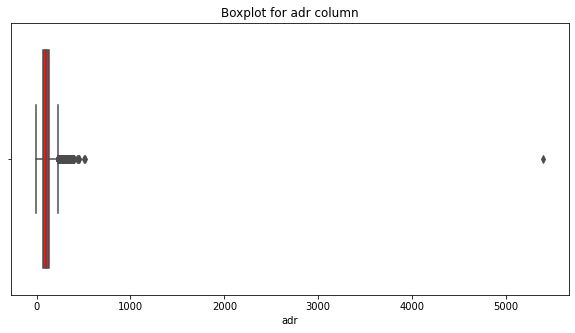

In [ ]:
# Let's confirm this by visualizing these columns individually using boxplot on these.
# Plotting adr column.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['adr'], color='red')
plt.title('Boxplot for adr column')

Text(0.5, 1.0, 'Boxplot for lead_time column')

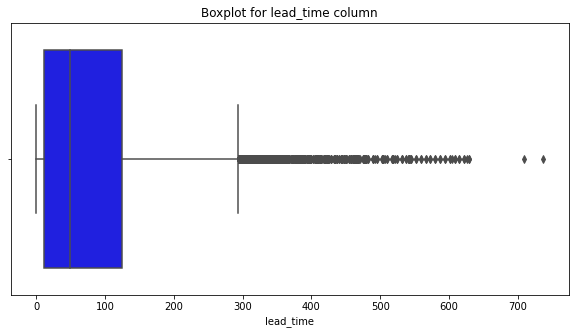

In [ ]:
# Plotting for lead_time column.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['lead_time'], color='blue')
plt.title('Boxplot for lead_time column')

Text(0.5, 1.0, 'Boxplot for days_in_waiting_list column')

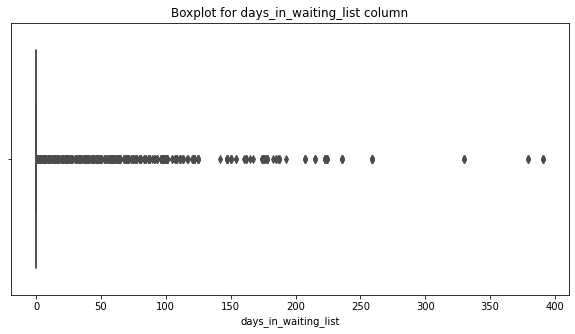

In [ ]:
# Plotting the days_in_waiting_list column.
plt.figure(figsize=(10,5))
sns.boxplot(x=df['days_in_waiting_list'], color='blue')
plt.title('Boxplot for days_in_waiting_list column')

In [ ]:
# Removing the outliers from these columns. We will use the Quantile method for this.
# As we can see that from the above boxplot for days_in_waiting_list, the Q1 and Q2 both have same value so we skip this column.
# As it clearly doesn't have outliers but just some high values.
relavent_columns = ['lead_time', 'adr']
# Getting the first and third quantile(top 25 and 75 percentile respectively).
Q1 = df[relavent_columns].quantile(0.25)
Q3 = df[relavent_columns].quantile(0.75)

# Getting the interquantile range(IQR).
IQR = Q3 - Q1

print(IQR)

lead_time    113.00
adr           61.85
dtype: float64


In [ ]:
# Getting the observations where outliers are not present in the relavent columns and overwriting the df to only include these observations.
df = df[~((df[relavent_columns] < (Q1 - 1.5*IQR)) | (df[relavent_columns] > (Q3 + 1.5*IQR))).any(axis=1)]
df.shape

(82005, 30)

### **First objective: Let's find out what is the best time of the year to book a hotel room? And also find out which is the busiest month of the Hotel?**

---



To solve this, we will take a look at the monthly booking data for both hotels combined and specifically as well as the time gap between the time of booking and the time of arrival(Lead Time).
We need to look at the lead time as it will help us answer the question of best time of the year to make the booking.

We can see that in the dataset, months are not in proper chronological order(as they appear in the calender). So we need to do Sorting to get the months in order to better visualize the trends through graphs.   

We do this by using a function called pd.categorical() in which we need to provide the column of our dataframe which contains the names of the months and an ordered list of months as arguments and it will sort the months and put them in chronological order in the dataframe itself so we don't have to do the sorting again.


In [ ]:
#  Creating the list of ordered months.
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#  Use "Categorical()" method of pandas to order "arrival_date_month" column in chronological order.
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)

In [ ]:
# Getting the monthly booking data for each hotel as well as the combined stats.
# Using Groupby to get value counts data for specific hotels. 
# And using unstack function to get extensive details that we store in another dataframe.

# Also Creating a transpose so we get our information column-wise. It also makes it easier to plot and read.
monthly_hotelwise_df = df.groupby('hotel')['arrival_date_month'].value_counts().unstack().T

# Let's see what this df looks like.
monthly_hotelwise_df.head()

hotel,City Hotel,Resort Hotel
arrival_date_month,,
January,2695,1906
February,3569,2427
March,4804,2572
April,4944,2772
May,5101,2787


Text(0.5, 1.0, 'Monthly Booking Data')

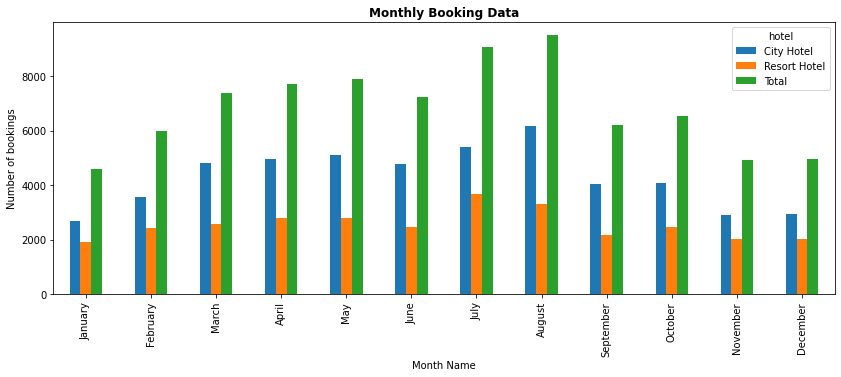

In [ ]:
# Now we also want to see the total booking stats for both hotels as well.
# Adding a new column which has total no. of bookings for both hotels combined. We do this by simply adding the two columns.
monthly_hotelwise_df['Total'] = monthly_hotelwise_df['City Hotel'] + monthly_hotelwise_df['Resort Hotel']

# Setting the figsize using plt.rcParams
plt.rcParams['figure.figsize'] = (14,5)

# Now we plot this dataframe using a bar chart.
monthly_hotelwise_df.plot.bar()

# Now changing the title and x and y labels.
plt.xlabel('Month Name')
plt.ylabel('Number of bookings')
plt.title('Monthly Booking Data', weight='bold')

Text(0.5, 1.0, 'Monthly Lead Time Data for both Hotels')

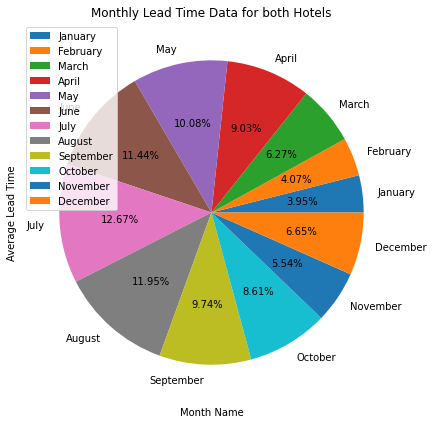

In [ ]:
# Now looking at the average Lead time for each month. We will use groupby for this and find mean of lead_time.
monthly_lead_time_df = df.groupby('arrival_date_month')['lead_time'].mean().reset_index()

# Setting the figsize 
plt.rcParams['figure.figsize'] = (7,7)

# Now we plot this df using a pie chart.And we use autopct argument to get the percantage share of each variable.
# We also need to set arrival_date_month as index for this.
monthly_lead_time_df.set_index('arrival_date_month').plot.pie(subplots=True,autopct='%1.2f%%')

# Also changing the title name and x and y labels to make the graph more understandable.
plt.xlabel('Month Name')
plt.ylabel('Average Lead Time')
plt.title('Monthly Lead Time Data for both Hotels')

### **Conclusions Drawn:**

From the graphs displayed above, we can answer with certainity that ***August is the busiest month*** for the hotels. This is evident when we look at monthly bookings graph. The overall booking numbers are highest in the Month of August. 

Now to determine when is the best time to book a hotel, we need to factor in a few things. The best time to make a booking would really depend on the purpose behind it. So as we mentioned, August is the busiest time of the year. Everyone is trying to make a booking in August despite a big lead time (Time gap between the time of booking and arrival). This, may be because of the wonderful Autumn weather which would also explain the increase in booking numbers during spring season i.e. from March to May as compared to before and after spring season. 

***On the basis of this assumption, August is the best time to book a hotel.***

However that also means that availability of the rooms would be an issue. And as we can see in the lead time chart, lead time is also highest for the months of July and August. ***So if we look at things from the point of view of availability of rooms and comfort in terms of avoiding large crowds, best time to make the booking will be in the month of January.*** As it has the least number of bookings and lead time is also the lowest.

### **Second Objective: Let's find out that when a customer is accompanied by children or babies, how likely is the hotel going to receive a special request?**

---
For this objective, we will need to look at the observations where customers were travelling with a child or a baby and look at the special requests made in those instances.






Text(0.5, 1.0, 'Frequency of No. of special requests made by customers travelling with a child or a baby')

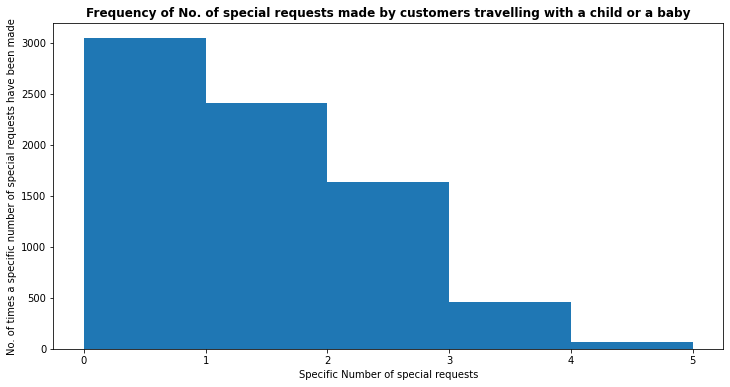

In [ ]:
# Extracting the observations for which the children or the babies column have values more than zero.
special_requests_df = df[(df['children']>0) | (df['babies']>0)]

# Now plotting these observations using a histogram. This gives us the frequency of the number of requests made as output.
# Storing the data we want to plot in a variable.
y = special_requests_df['total_of_special_requests']

# Plotting the data using a histogram. We can use the bins argument to set values that we want to plot on x-axis which in this case 
# are unique number of special requests. We get these values by converting our column to a list and then passing it to a set.
bins = list(set(y.to_list()))

# Creating the histogram.
fig, ax = plt.subplots(figsize =(12, 6))
ax.hist(y,bins=bins, histtype='bar') 

# Setting the labels and title.
plt.xlabel('Specific Number of special requests')
plt.ylabel('No. of times a specific number of special requests have been made')
plt.title('Frequency of No. of special requests made by customers travelling with a child or a baby', weight='bold')


Text(0.5, 1.0, 'Frequency of No. of special requests made by customers travelling with a child or a baby')

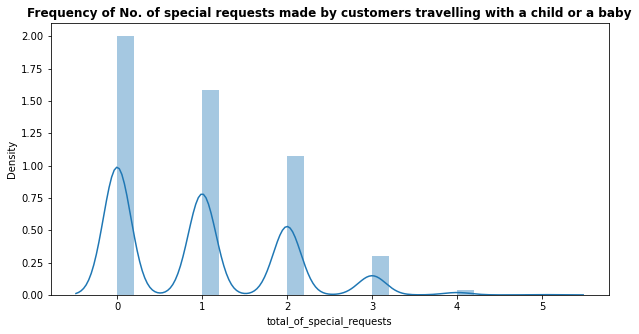

In [ ]:
# Plotting these values using a distplot as well.
plt.figure(figsize=(10,5))
sns.distplot(y)

# Setting the title.
plt.title('Frequency of No. of special requests made by customers travelling with a child or a baby', weight='bold')

The above graph demonstrates the sheer number of times a certain number of special requests have been made by customers travelling with children or babies.

Text(0.5, 1.0, 'Number of zero and non-zero special requests for customers travelling with children or babies')

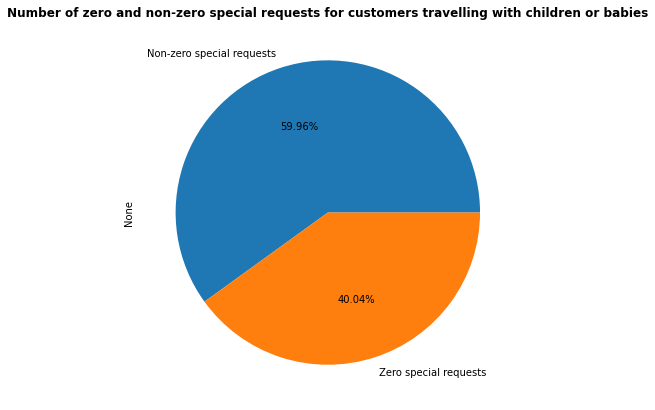

In [ ]:
# Of the customers travelling with children or babies, what are the number of total observations that have made at least one special requests.
m = special_requests_df[special_requests_df['total_of_special_requests']!=0]['total_of_special_requests'].count()

# Of the customers travelling with children or babies, what are the number of total observations that have made at least zero special requests.
n = special_requests_df[special_requests_df['total_of_special_requests']==0]['total_of_special_requests'].count()

# Now let's plot these two numbers to see the difference. We do this by creating a series in which we pass the list of above two variables
# and then we plot it using a pie chart. And we use autopct argument to get the percantage share of each variable. 
pd.Series([m,n]).T.rename(index={0:"Non-zero special requests", 1:"Zero special requests"}).plot.pie(autopct='%1.2f%%')

# Setting the title.
plt.title('Number of zero and non-zero special requests for customers travelling with children or babies', weight='bold')

### **Conclusions Drawn :** 

By the charts drawn above, it is clear that when dealing with customers travelling with children or babies, although there are several instances where a special request has not been made, customers travelling with children or babies tend to make special requests more often than not with many such customers often making two,three and even upto 5 special requests in a few cases as can be seen from the histogram.

In-fact ***there is a 59.96 percent probability of a hotel receiving at least one special request*** when dealing with such customers. This is clearly demonstrated in the above pie chart.


### **Third Objective: Find out which market segment has made the most and least number of cancellations? Find out from which market segment is a customer most likely to cancel the booking? Does the booking cancellation affect repetition of customers?** 

---



To solve this question, we will take a look at the cancellations, market segments and repeated guests data.

Text(0.5, 1.0, 'Number of Cancellations by Market Segment')

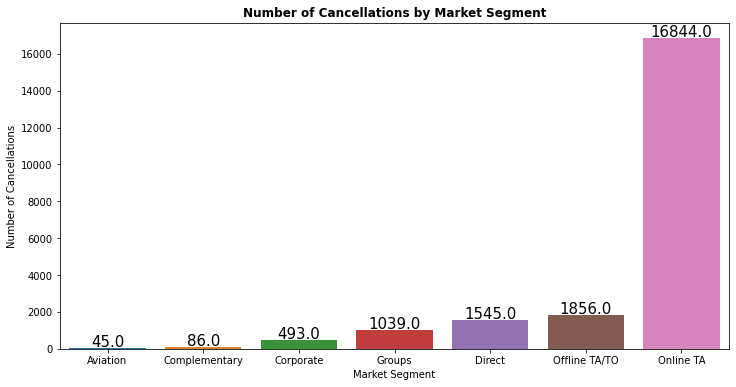

In [ ]:
# Retrieving the relavant columns.
cancellation_df = df[['market_segment','is_canceled','is_repeated_guest']]

# Using Groupby on market_segment column to see data for specific market segments. And calling the sum function on the is_canceled column
# will give us the number of cancellations for each market segment.
market_cancel_data = cancellation_df.groupby('market_segment')['is_canceled'].sum().sort_values(ascending=True).reset_index()

# Using the seaborn library, and the barplot function, we plot the above data.
plt.figure(figsize=(12,6))
plots = sns.barplot(x="market_segment", y="is_canceled", data=market_cancel_data)

# Now we can iterate over each bar to annotate the values held by different variables in our chart.
# Using Matplotlib's annotate function and passing the coordinates where the annotation will be done

# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 6)
# ha and va stand for the horizontal and vertical alignment which we will set to center and size is the font.
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.1f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 6),textcoords='offset points')
  
# Now setting the labels and the title.
plt.xlabel('Market Segment')
plt.ylabel('Number of Cancellations')
plt.title('Number of Cancellations by Market Segment', weight='bold')

Text(0.5, 1.0, 'Number of Repetitions of customers who canceled a booking')

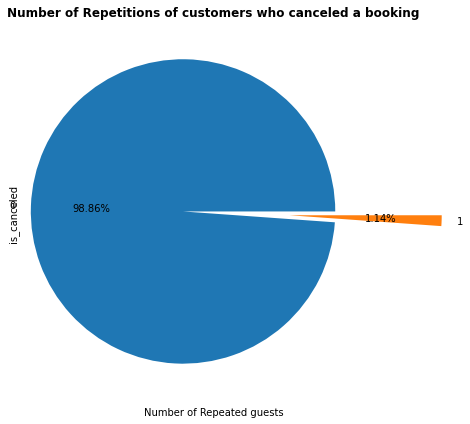

In [ ]:
# Getting those observations for which there was a cancellation(using a condition that is_canceled column has value greater than zero).
# Now using groupby on this new df to find out in how many of these instances, there was a repetition.
new_cancellation_df = cancellation_df[cancellation_df['is_canceled']>0].groupby('is_repeated_guest').count()

# Now we plot this
new_cancellation_df['is_canceled'].plot.pie(subplots=True,autopct='%1.2f%%', explode=(0.2,0.5))  

# Setting the labels.
plt.xlabel('Number of Repeated guests')
plt.title('Number of Repetitions of customers who canceled a booking', weight='bold')

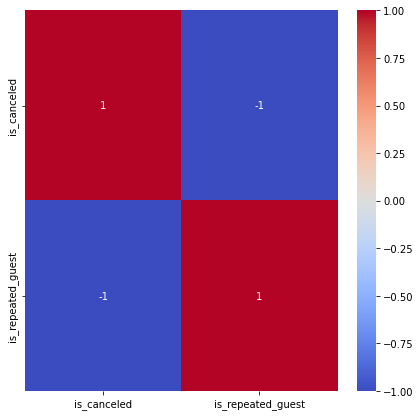

In [ ]:
# Denoting the correlation between repetitions and cancellations using a heatmap.
sns.heatmap(new_cancellation_df.reset_index()[['is_canceled','is_repeated_guest']].corr(), vmin=-1, cmap='coolwarm', annot=True)

We can clearly say that cancellations and repetitions are negatively correlated.

### **Conclusions Drawn:**

Clearly we can see from the first graph(bar plot) above that ***the market segment which has made the least number of cancellations is Aviation*** with just 45 cancellations.  
The primary reason for this is that travelling by air is still a very reliable mode of transport in that it gets you to your destination on time.So only if the flight itself is cancelled, or is delayed/rescheduled by a very long period, then only the hotel rooms booked are cancelled.

***Online Travel agencies are the market segment responsible for the most number of cancellations and are thus most likely to cancel a booking***. This can be explained by the fact that for tour operators/ travel agencies offer their services(travel packages) to a large number of clients and these services are available over a long period of time - either on their website or other means, which means there are usually a lot of changes that can happen for example more people can book the package, some people can cancel, the entire visit can be rescheduled etc. Due to these and some other factors, these agencies/operators cancel their bookings far more than other market-segments. We can clearly see this in the market segment - cancellation graph.

Now from the second graph(pie chart) above, we can see that ***of those bookings which ended in a cancellation, only a litte more than one percent(1.14%) of the guests were repeated guests***(booked a room in the same hotel again). Also, we can see from the heatmap that ***cancellations and repetitions are negatively correlated*** or inversely proportional in mathematical terms. Meaning if repetitions are high, cancellations will be low and vice versa.

So clearly, cancellations do have a severe impact on the repetition of customers.

### **Fourth Objective: Find out which market segment has least number of days on the waiting list? Also analyze the days on waiting list for various distribution channels.**

---
To solve this, we will need to look at the market segment, distribution channel and waiting list data.


In [ ]:
# Now let's see which market segment has the least number of days on the waiting list.
# For this, we will use groupby on market segment column and get the mean of the days in waiting list which is the average waiting time.
market_segment_waiting_list_df=df.groupby('market_segment')['days_in_waiting_list'].mean().reset_index()
market_segment_waiting_list_df

,market_segment,days_in_waiting_list
0,Aviation,0.000000
1,Complementary,0.005755
2,Corporate,0.134146
3,Direct,0.046907
4,Groups,5.567324
5,Offline TA/TO,1.875334
6,Online TA,0.002641


Text(0.5, 1.0, 'Days on waiting list by Market Segment')

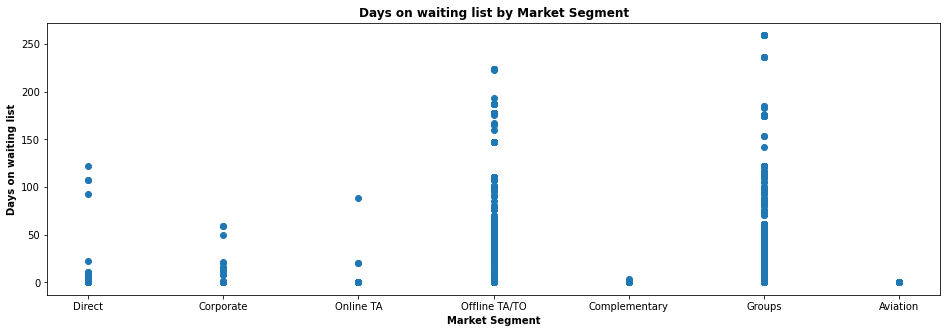

In [ ]:
# Plotting the values using scatterplot.
plt.figure(figsize=(16,5))
plt.scatter(df['market_segment'], df['days_in_waiting_list'])

# Setting the title and labels.
plt.xlabel('Market Segment', weight='bold')
plt.ylabel('Days on waiting list', weight='bold')
plt.title('Days on waiting list by Market Segment', weight='bold')

The above graph shows us which market segment has had how many days on the waiting list.

In [ ]:
# Now let's analyze number of days on waiting list for various distribution channels using same approach as above.
distribution_channel_market_segment_df = df.groupby('distribution_channel')['days_in_waiting_list'].mean().reset_index()
distribution_channel_market_segment_df

,distribution_channel,days_in_waiting_list
0,Corporate,0.207828
1,Direct,0.081900
2,GDS,0.000000
3,TA/TO,0.725913
4,Undefined,0.000000


Text(0.5, 1.0, 'Days on waiting list by Distribution Channel')

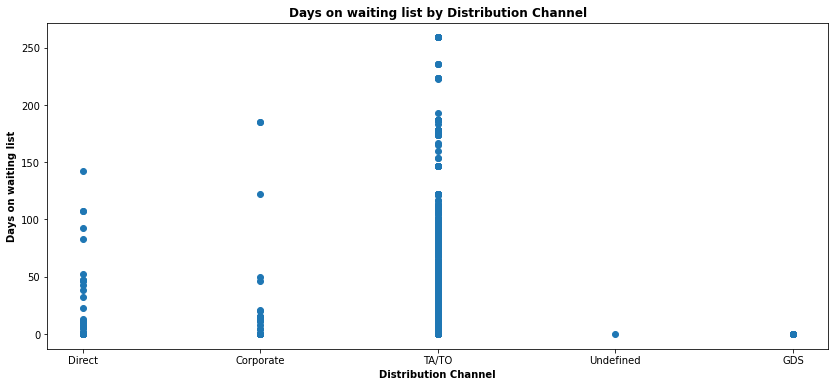

In [ ]:
# Plotting distribution channel and waiting list data from the df using another scatter plot.
plt.figure(figsize=(14,6))
plt.scatter(df['distribution_channel'],df['days_in_waiting_list'])

# Setting the title and labels.
plt.xlabel('Distribution Channel', weight='bold')
plt.ylabel('Days on waiting list', weight='bold')
plt.title('Days on waiting list by Distribution Channel', weight='bold')

### **Conclusions Drawn:**

We can clearly see from the values and first scatterplot graph above that ***the market segment that has the least number of days on average is Aviation***. 

This is because Airlines have to arrange for accomodations for their pilots and crew members. And most of the flights follow a hectic schedule which means a lot of back and forth travel between destinations for the crew members. So, Airline crews can't afford to wait to get a hotel room. And so they don't prefer hotels that put them on a waiting list.Therefore, Hotels go to extraordinary lengths to provide preferential treatment for customers of the Aviation segment like making special arrangements for providing rooms with minimum waiting time possible.  

Now as we can see from the above graph that ***the distribution channel that has the most number of days on the waiting list is the travel agency/tour operators.*** This can be explained by the fact that these agencies/operators cancel their bookings far more than other market-segments. We can clearly see this in the market segment - cancellation graph(in previous objective) that travel agencies/operators are responsible for most number of cancellations. So the hotels tend to prioritize others over them.

### **Fifth Objective: What is the percentage of cancelled and non-cancelled bookings? Which type of hotel is more likely to be cancelled?**

---





 *    **Below is the code to reperesent the proportion of cancelled and not cancelled bookings by pie chart**

In [ ]:
# code to find out the number of cancelled and non-cancellaed bookings for both hotels
# value_counts method is used to count the total number of cancelled and non-cancelled bookings
# normalize is set to True i.e. getting percentage count which is sometimes better than normal count for analysis

cancel_vs_not_cancelled_df = df['is_canceled'].value_counts(normalize = True)
cancel_vs_not_cancelled_df

0    0.732846
1    0.267154
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Non-Cancelled')

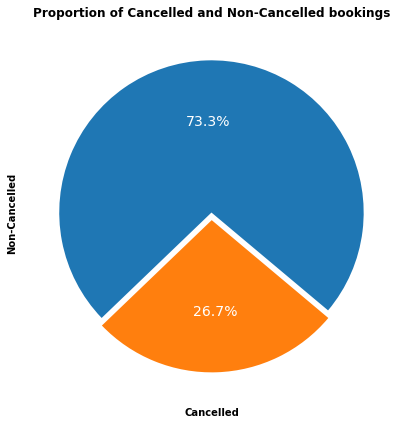

In [ ]:
#  draw pie chart for canceled and non-canceled bookings
#  A wedge of a pie chart can be made to explode from the rest of the wedges of the pie chart using the explode parameter of the pie function.

explode = (0, 0.05)

#  startangle parameter is used to rotatate a pie chart by various angles
#  autopct parameter enables you to display the percent value using Python string formatting  
#  textprops parameter is used to change color and fontsize of values inside pie chart

plt.pie(cancel_vs_not_cancelled_df,startangle = 320,explode=explode, autopct='%1.1f%%' , textprops={'color':"w",'fontsize':14})
plt.title('Proportion of Cancelled and Non-Cancelled bookings', weight='bold')  #  title to represent graph objective 
plt.xlabel("Cancelled", weight='bold') #  label at x-axis with font style as bold
plt.ylabel("Non-Cancelled", weight='bold') #  label at y-axis with font style as bold


* **Below is the code to check the number of bokings cancelled for both City hotel and Resort Hotel**

In [ ]:
# count the total number of cancelled and non-cancelled bookings for City hotel and Resort hotel
# apply groupby on "is_canceled" column to find the total enteries of each hotel type 
# normalize is set to True i.e. getting percentage count 

df.groupby('is_canceled')['hotel'].value_counts(normalize = True)


is_canceled  hotel       
0            City Hotel      0.604356
             Resort Hotel    0.395644
1            City Hotel      0.688333
             Resort Hotel    0.311667
Name: hotel, dtype: float64

Text(0.5, 0, 'Cancelation status')

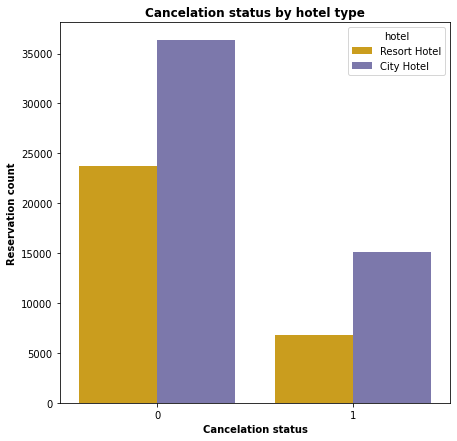

In [ ]:
#  plot the count plot of seaborn library for the total number of bookings cancelled  and non-cancelled by City hotel and Resort hotel
#  palette parameter is used for different color patterns
#  hue parameter represents which column in the data frame, you want to use for color encoding.

sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Dark2_r')
plt.title('Cancelation status by hotel type',weight='bold') #  title to represent graph objective
plt.ylabel('Reservation count', weight='bold') #  label at y-axis with font style as bold
plt.xlabel('Cancelation status',weight='bold') #  label at x-axis with font style as bold


### **Conclusions Drawn:**

*  The above pie chart depicts proportion or percentage of cancelled & Not cancelled bookings.
*  According to the pie chart, 73.3% bookings were not cancelled and 26.7% of the bookings were cancelled at the Hotel.
* According to the count plot, a total of 31.46% Bookings were cancelled at the Resort  and a total of 68.5% Bookings were cancelled at the City Hotel
* We see that City Hotel has highest number of cancellations. It also has highest number of bookings.


### **Sixth Objective: Which was the most booked accommodation type (Single, Couple, Family).**

---



In [ ]:
#  Select single, couple and family  with kids from the dataframe

#  use (if) conditional statment to fecth dataset accroding to the following criteria:
#    if adults = 1 and children = 0 and babies = 0 ,then a customer is a single person
#    if adults = 2 and children = 0 and babies = 0 ,then a customer is a couple
#    if  sum of (adults + children + babies) > 2 ,then a customer is a family with children or babies

single   = df[(df.adults==1) & (df.children==0) & (df.babies==0)]
couple   = df[(df.adults==2) & (df.children==0) & (df.babies==0)]
family   = df[ (df.adults + df.children + df.babies) > 2]


#  Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family']   #  list of category to represent in x-axis in graph

#  shape[0] will display the number of rows/entries in each category : single , couple and family
count_data = [single.shape[0],couple.shape[0], family.shape[0]]  #  list of shape of each category

#  find the percentage for each category to represent in y-axis on graph
count_percent = [each_category/df.shape[0]*100 for each_category in count_data]





Text(0, 0.5, 'Booking Count Percent(%)')

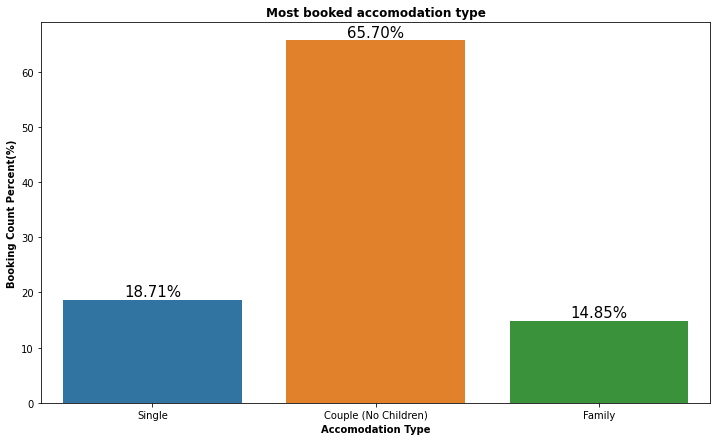

In [ ]:
# Setting the figsize.
plt.figure(figsize=(12,7))

# plot the bar plot of seaborn library to represent the categories of customers
plots = sns.barplot(names,count_percent)

# below is the code to annotate bars i.e. write values on top of each bar 

#  Iterrating over the bars one-by-one

for bar in plots.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  #  x-coordinate: bar.get_x() + bar.get_width() / 2
  #  y-coordinate: bar.get_height()
  #  free space to be left to make graph pleasing: (0, 8)
  #  ha and va stand for the horizontal and vertical alignment
     plots.annotate(format(bar.get_height(), '.2f') + '%' ,
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title('Most booked accomodation type', weight='bold')  #  title to represent graph objective
plt.xlabel('Accomodation Type', weight='bold')  #  label at x-axis with font style as bold
plt.ylabel('Booking Count Percent(%)' , weight='bold') #  label at y-axis with font style as bold


### **Conclusions drawn:**

*   Couples have highest accommodation numbers as compared to other categories.
*   Family category have least accommodation numbers.
*  Around 65% of bookings were made by couples.
*  Only 15% of bookings were made by famililes.




### **Seventh Objective: How the Average Price Per Night (ADR) varies Over the Year by Hotel Type?** 

---



In [ ]:
#  apply groupby on the column arrival_date_month and hotel to find the mean of adr(average daily rate) to find the change in adr monthly  
#  represent whole year by monthly adr for the respective hotel 
#  round() method is used to round a number to a given precision in decimal digits.
df.groupby(['arrival_date_month','hotel'])['adr'].mean().round().reset_index()


,arrival_date_month,hotel,adr
0,January,City Hotel,85.0
1,January,Resort Hotel,49.0
2,February,City Hotel,88.0
3,February,Resort Hotel,54.0
4,March,City Hotel,93.0
5,March,Resort Hotel,58.0
6,April,City Hotel,115.0
7,April,Resort Hotel,79.0
8,May,City Hotel,126.0
9,May,Resort Hotel,81.0


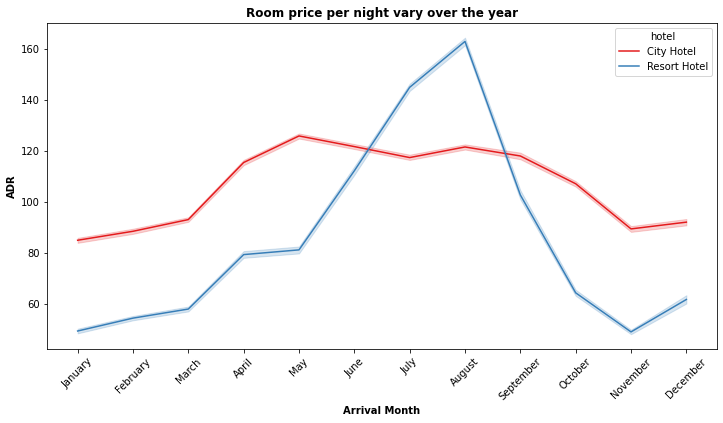

In [ ]:
# Setting the figsize.
plt.figure(figsize=(12,6))

#  plot the line graph of seaborn library to represent adr monthly for each hotel type
#  x and y are columns to be plot on graph 
#  data is name of dataframe 
#  hue parameter represents which column in the data frame, you want to use for color encoding.
#  palette parameter is used for different color patterns
#  hue_order represents the order of hotel shown by bars

sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')
plt.title("Room price per night vary over the year", weight = 'bold') #  set the title of graph
plt.xlabel("Arrival Month" , weight='bold')  #  label at x-axis with font style as bold
plt.xticks(rotation=45)  # rotate the x-axis label by 45 degree angle
plt.ylabel("ADR" , weight='bold')   #  label at y-axis with font style as bold

#  to show a graph.It is necessary when you are using Matplotlib in terminal and optional when you are using notebook
plt.show()

### **Conclusions drawn:**

*  For Resort hotel, the price per night (ADR) is highest during July and August.

*   For City hotel, the price per night (ADR) is highest during May , June and July. 




### **Eighth Objective: What is the Effect of Meal type on Cancellations?**

---



In [ ]:
#  apply groupby on "meal" column to see the total count for cancelled and non-cancelled bookings that have effect on meal type 
df.groupby('meal')['is_canceled'].value_counts(normalize = True)

meal       is_canceled
BB         0              0.742533
           1              0.257467
FB         0              0.731959
           1              0.268041
HB         0              0.745902
           1              0.254098
SC         0              0.650358
           1              0.349642
Undefined  0              0.844098
           1              0.155902
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

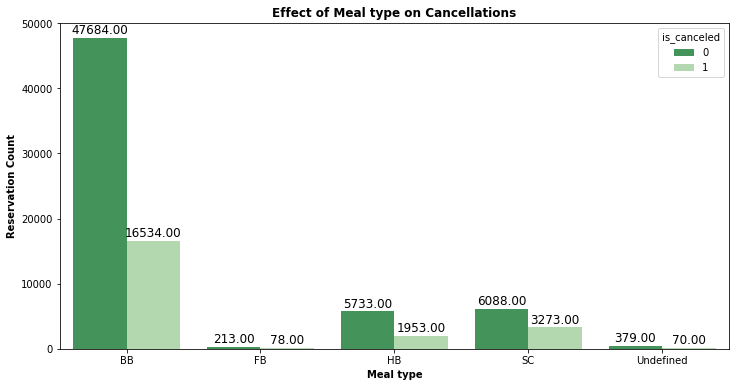

In [ ]:
# Setting the figsize.
plt.figure(figsize=(12,6))

#  plot countplot of seaborn library to represent mael type data on cancel bookings
plots = sns.countplot(x= 'meal',hue = 'is_canceled',data = df,palette= 'Greens_r')

# below is the code to annotate bars i.e. write values on top of each bar 

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  #  Using Matplotlib's annotate function and
  #  passing the coordinates where the annotation shall be done
  #  Annotation means adding notes to a diagram stating what values do it represents. 
  #  It often gets tiresome for the user to read the values from the graph when the graph is scaled down 
  #  or is overly populated
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
plt.title ('Effect of Meal type on Cancellations',weight = 'bold')  #  set the title of a graph
plt.xlabel("Meal type" ,weight = 'bold')  #  set label on x-axis having font style as bold
plt.ylabel('Reservation Count' , weight = 'bold')  # set label on y-axis having font style as bold

### **Conclusions drawn:**

* From the graph, we can see that more number of reservations are booked by the guest for BB(Bed and breakfast) meal type.

* Approximately 25 % of BB(bed and breakfast) meal were cancelled by the guest.

* Approximately 14 % of undefined/SC(no meal package) were cancelled.

* HB – Half board(breakfast and one other meal – usually dinner) 
and FB – Full board(breakfast, lunch and dinner) is less preferred as compared to BB(Bed and breakfast).



### **Ninth Objective: What are the types of hotel?  What type of Hotels does a customer book in general?**

---



Types of hotel are ['Resort Hotel' 'City Hotel'].
City Hotel      51400
Resort Hotel    30605
Name: hotel, dtype: int64
Index(['City Hotel', 'Resort Hotel'], dtype='object')


<Figure size 576x360 with 0 Axes>

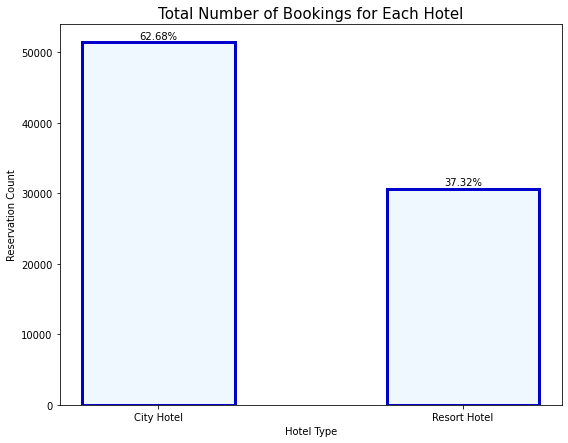

In [ ]:
# get types of hotel
types_of_hotel = df.hotel.unique()
print(f"Types of hotel are {types_of_hotel}.")

hotel_list = df['hotel'].value_counts()           # gives total value of City hotel and Resort Hotel
hotel_count = df['hotel'].value_counts().index     # gives the values index of the hotel

print(hotel_list)     
print(hotel_count)  

# setting the size of graph  
plt.figure(figsize = (8,5))

# creating the bar graph
fig, ax = plt.subplots(figsize = (9,7))
plt.bar(hotel_count, hotel_list, color ='aliceblue', width = 0.5, edgecolor = 'mediumblue',lw =3)
plt.title('Total Number of Bookings for Each Hotel', size =15)
plt.xlabel('Hotel Type')
plt.ylabel('Reservation Count')
for p in ax.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

### **Conclusions Drawn:**
**From above graph there are 2 types of Hotel** 

1. City Hotel has approx 53500 bookings and Resort Hotel has approx 33500 bookings respectively.

2. According to the above graph says that approximately 39% of the reservations were booked for Resort hotel and 61% were booked for City Hotel.

3. It means that people mostly prefer City Hotel as compared to Resort Hotel.


###**Tenth Objective: Which meals do the customers prefer the most?**

---



BB           78.309859
SC           11.415158
HB            9.372599
Undefined     0.547528
FB            0.354856
Name: meal, dtype: float64


Text(0, 0.5, 'Count of booking')

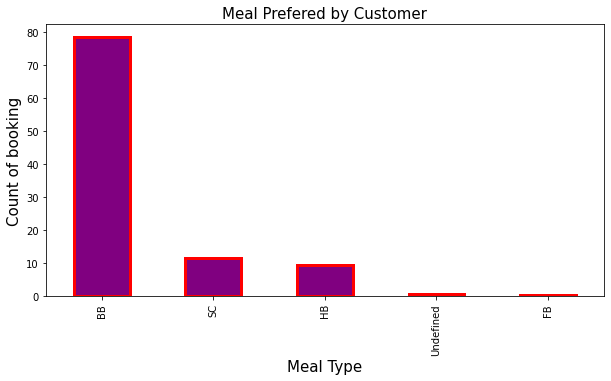

In [ ]:
# preferred type of meal

preferred_meal = df.meal.value_counts(normalize=True)*100     # this line give the values in percentage
print(preferred_meal)

#plotting the Graph
plt.figure(figsize=(10,5))
preferred_meal.plot(kind='bar', color ='purple', edgecolor ='red', lw = 3)
plt.title('Meal Prefered by Customer', size =15)
plt.xlabel('Meal Type',size=15)
plt.ylabel('Count of booking',size =15)



### **Conclusions Drawn:**
* By seeing graph we can clearly say that most preferrable meal is BB i.e Bed and Breakfast with over 70% counts followed by SC(Self Catering),HB(Half Board).
* Much less preferred meal is FB i.e Full Board.

### **Eleventh Objective: Explore the Number of Special Requests made.**


In [ ]:
df['total_of_special_requests'].value_counts(normalize = True).reset_index().rename(columns = {'index':'count','total_of_special_requests':'Special requests in %'})  

,count,Special requests in %
0,0,0.501567
1,1,0.334565
2,2,0.134370
3,3,0.025706
4,4,0.003414
5,5,0.000378


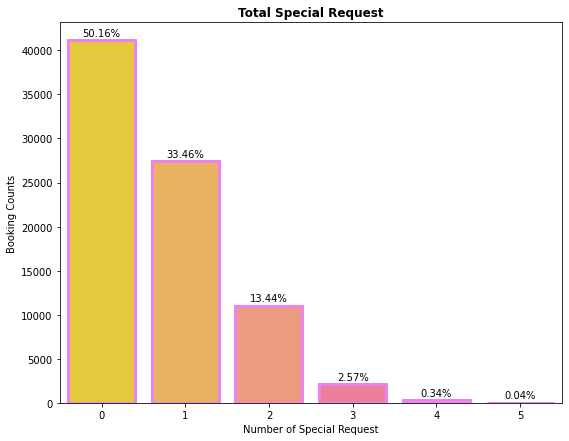

In [ ]:
# potting graph for special requests
fig, ax = plt.subplots(figsize = (9,7))
sns.countplot(x='total_of_special_requests', data=df, palette = 'spring_r',edgecolor = 'violet', lw=3)
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Booking Counts')

for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center")

### **Conclusions Drawn:**
* From the above graph, we see that around 50.16% bookings do not have any special requests from the guests.
* 33.46% bookings have one special request made by the guests.
* There are around 13.44% and 2.57% bookings where two and three requests have been made.
* And we can say that very few number of guests made four and five special requests  - 0.34%, 0.04% respectively.



###**Twelfth Objective : Checking Which country of origin has highest number of Hotel Bookings?**

In [ ]:
#checking the top_10_countries
top_10_countries = df[df['is_canceled']==0]['country'].value_counts()[:10].reset_index().rename(columns={'index':'country','country':'no_of_bookings'})



In [ ]:
top_10_countries['percentage']=(top_10_countries['no_of_bookings']/top_10_countries['no_of_bookings'].sum())*100
top_10_countries

,country,no_of_bookings,percentage
0,PRT,16988,34.302560
1,GBR,7772,15.693401
2,FRA,6902,13.936677
3,ESP,5071,10.239480
4,DEU,4144,8.367660
5,IRL,2235,4.512963
6,ITA,1931,3.899120
7,BEL,1620,3.271141
8,NLD,1526,3.081334
9,USA,1335,2.695663


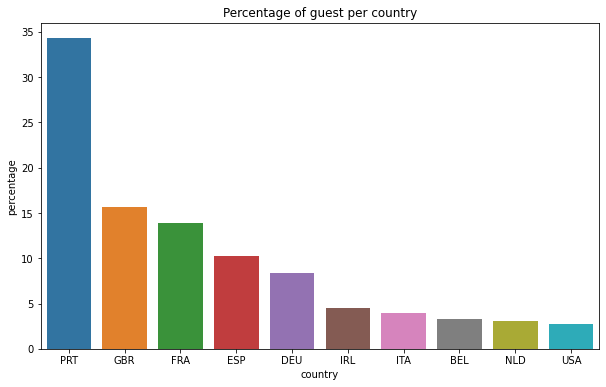

In [ ]:
#plotting percentage of guest per country
plt.figure(figsize=(10,6))
sns.barplot(x="country", y="percentage", data=top_10_countries).set(title='Percentage of guest per country')
plt.show()


### **Conclusions Drawn:**
From the above graph, we can see that countries responsible for most number of bookings are PRT(Portugal), GBR(Great Britain) & FRA(France).


### **Thirteenth Objective : Analysing How long does guests stay at the hotel on weekends and weekdays**

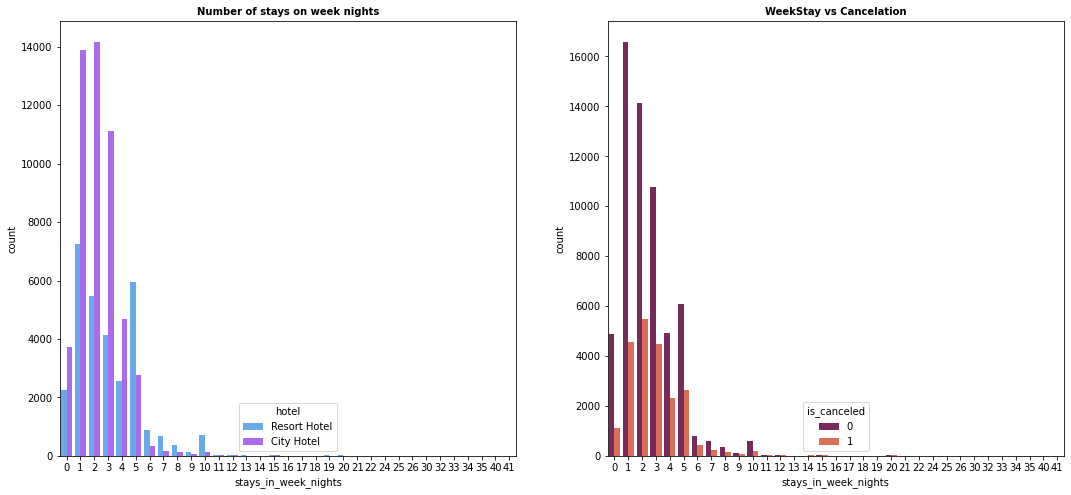

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'stays_in_week_nights',hue='hotel' ,palette='cool')
plt.title("Number of stays on week nights",fontweight="bold", size=10)
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'stays_in_week_nights', hue='is_canceled', palette='rocket')
plt.title('WeekStay vs Cancelation',fontweight="bold", size=10)

plt.show()

### **Conclusions Drawn :**
We can see from graph that most people are staying at hotel for 1 or 2 nights in week nights as well as weekend nights.

And second graph is showing that most cancellation is done for room which is booked for 2 night stay and we also see that most booking were not cancelled for 1 night stay


### **Fourteenth Objective : Analyse the type of customers Hotels have.**

Text(0.5, 1.0, 'Customer_type')

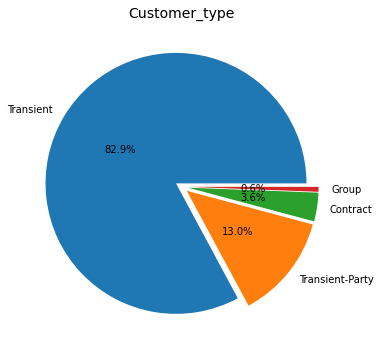

In [ ]:
#getting count of customer_type
customer_count = df['customer_type'].value_counts()
customer_labels = df['customer_type'].value_counts().index.tolist()
#Plotting using matplotlib
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(customer_count, autopct="%.1f%%", explode=[0.05]*4, labels=customer_labels, pctdistance=0.5)
plt.title("Customer_type", fontsize=14)

### **Conclusions Drawn :**
As we see from the graph, most customers(over 80%) are of transient type - people who move a lot.

### **Fifteenth Objective: Explore the relationship between repetitions and cancellations.**

Text(0.5, 1.0, 'Relation between repeated customer and cancellation')

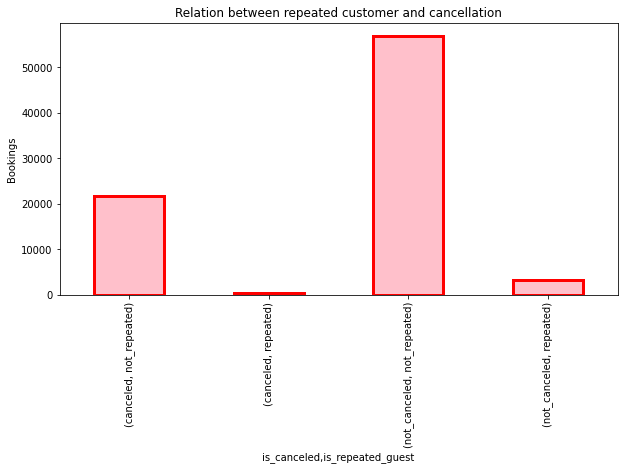

In [ ]:
# again the same step by replacing 1,0 of is_canceled and is_repeated_guest to string values.
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
df['is_repeated_guest'] = df.is_repeated_guest.replace([1,0], ['repeated', 'not_repeated'])

#Plotting graph
repetition_cancellation_df=df.groupby(['is_canceled','is_repeated_guest']).size()
repetition_cancellation_df.plot(kind='bar', color ='pink', edgecolor ='red', lw = 3, figsize = (10,5));
plt.ylabel('Bookings')
plt.title('Relation between repeated customer and cancellation')

### **Conclusions Drawn:**
We see that when the customer is a repeated guest and the booking is cancelled the number of such cases is almost zero which means that repeated guests are less likely to cancelled their booking.


# **Analysing our dataset furthermore.**

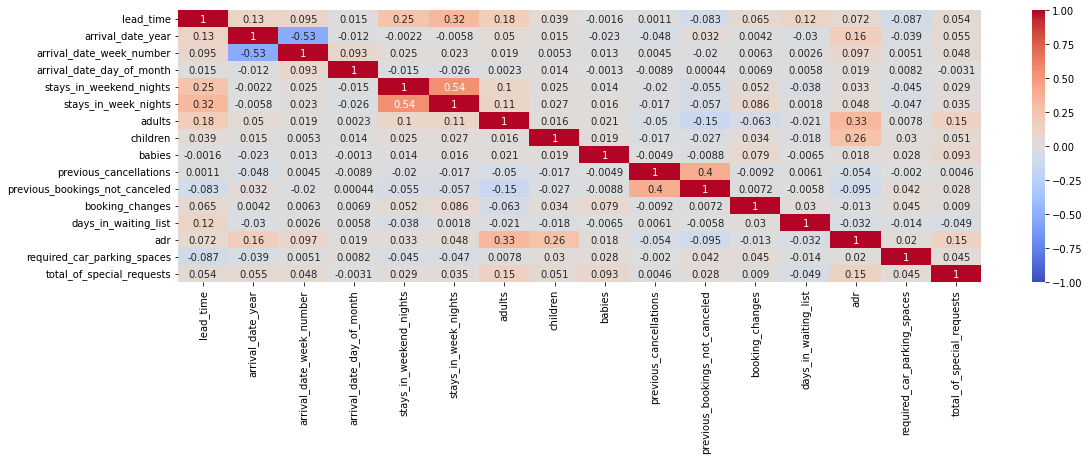

In [ ]:
# Representing the correlation amongst all the numerical columns using a heatmap.
heatmap_data = df.corr()

# Now we plot it.
plt.figure(figsize=(18,5))
sns.heatmap(heatmap_data, vmin=-1, cmap='coolwarm', annot=True)

Above Heatmap shows us the correlation between all the numerical columns present in our dataset.

In [ ]:
# Plotting the entire dataframe using pairplot. This will plot each column of our df with every other column.
sns.pairplot(df)

# **Insights Gained:**



*   From the data of bookings made for specific months throughout the year, we see that some months have much higher bookings than other with August being the busiest month. For these months, the hotels should take special care like hiring more staff to cater to the large number of guests. Also, during the winter months - where we see the number of bookings drop, efforts can be made to increase the numbers - For example: Striking an agreement with a travel agency to market their travel packages for those months by offering their customers a significant discount.
*   When looking at the customers travelling with a child or a baby, we found that while dealing with such customers, the number of total special requests made increases. Such customers tend to make one or more special requests more often than not. So in such cases, hotels can anticipate special requests and should make special effort to accomodate such customers.
*   We learned that the Aviation segment is the segment with the least number of cancellations and due to this and the unique requirements due to the nature of work in aviation industry, the aviation segment is least likely to be put on the waiting list when booking a hotel.
*   We learned that the distribution channel that accounts for the most number of cancellations is Travel agencies and so they have the most number of days on the waiting list.
*   We also found that those customers who are a repeated guest (have had a stay in the same hotel before), tend to cancel far less.
*   Almost 25% of the bookings were cancelled.Number of bookings cancelled in City hotel is more as compared to Resort hotel.
*   In order to minimize the cancellation, the hotel must keep an eye on the pricing of the hotel stays on other channels, including OTAs(Online travelling agency) that the hotels are not partnering with. This is to ensure that their customers don’t jump to re-booking their hotel rooms on other channels at lower prices.
*   Couple is the most popular accomdation type having highest number of bookings. Hotel can make arrangements accordingly which are best suited for couples.
*   After analysing the ADR(Price per night) for both hotel, we can see that ADR is highest during May-August period.These months have the highest booking and it could be reason for high ADR during this period. 
*   After analyzing the effect of meal type on cancellations, we have found that BB(Bed and Breakfast) meal type is the meal type which is cancelled by guest the most.Just as guests are looking for clean hotel rooms, they are also looking for clean F&B outlets. So, Hotels should take food safety seriously.
*   By analysing the country of origin data, we found that Portugal, Great Britain, France, Spain are the list of top countries where most of the guest come from.
*   Most preferred meal category is BB (Bed and Breakfast) followed by SC (self-catering)
*   Most people prefer City Hotel over Resort Hotel as over 60% of bookings are for City Hotel.
*   By analysing the duration of stay during weekdays and weeknights, we found that most guests tend to stay for one or two nights only.


---












